In [1]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import random
from seaborn.algorithms import bootstrap

# Quantitative analyses
This notebook contains code to plot and bootstrap confidence intervals for accuracies and other metrics for both context-unaware and context-aware trained agents.
Code defaults to context-aware, context-unaware results can be loaded by setting the context-unaware flag.

In [2]:
datasets = ('(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)')
n_attributes = (3, 3, 3, 4, 4, 5)
n_values = (4, 8, 16, 4, 8, 4)
n_epochs = 300
n_datasets = len(datasets)
paths = [f'results/vague_ds_results/{d}_game_size_10_vsf_3/' for d in datasets]

In [3]:
context_unaware = False # whether original or context_unaware simulations are evaluated
if context_unaware:
    setting = 'context_unaware'
else:
    setting = 'standard' # context-aware

## Accuracies

### Training trajectories

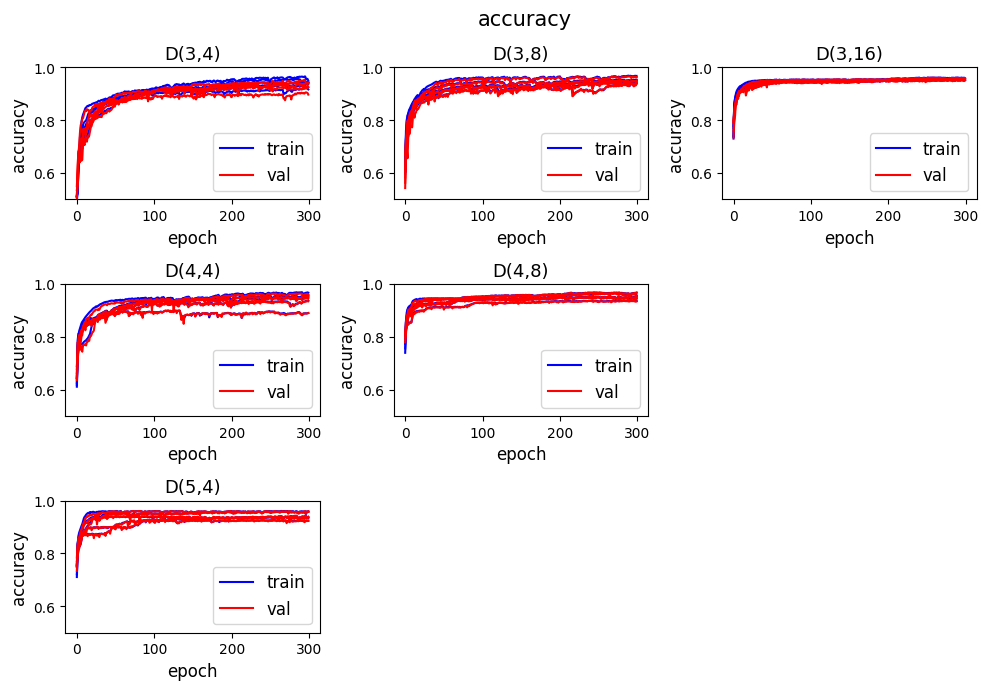

In [6]:
#all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=400, val_steps=1, zero_shot=False, context_unaware=context_unaware)
#plt.plot(all_accuracies['train_acc'][0])
#plt.show()
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=False, context_unaware=context_unaware)
plot_training_trajectory(all_accuracies['train_acc'], all_accuracies['val_acc'], ylim=(0.5, 1), steps=(1, 1))


### Learning speed

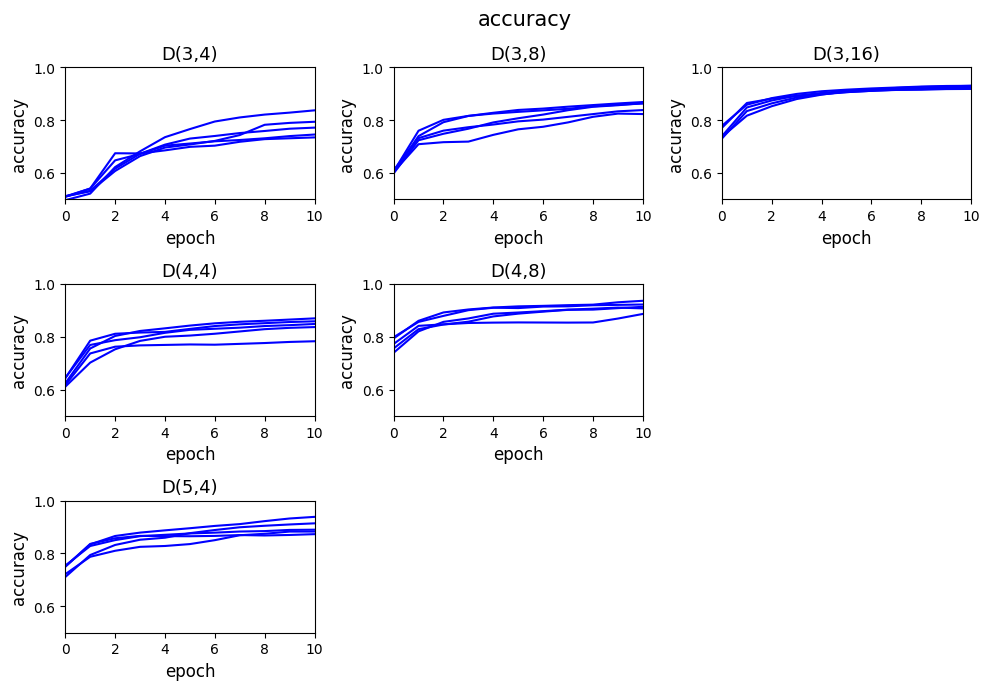

In [7]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=False, context_unaware=context_unaware)
plot_training_trajectory(all_accuracies['train_acc'], all_accuracies['val_acc'], ylim=(0.5, 1), xlim=(0, 10), steps=(1, 1), train_only=True)

### Final accuracies 
Final accuracies heatmap plot + get accuracy means and sds for table representation.

In [5]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=False)
accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc']]
test_accuracies = [all_accuracies['test_acc']]

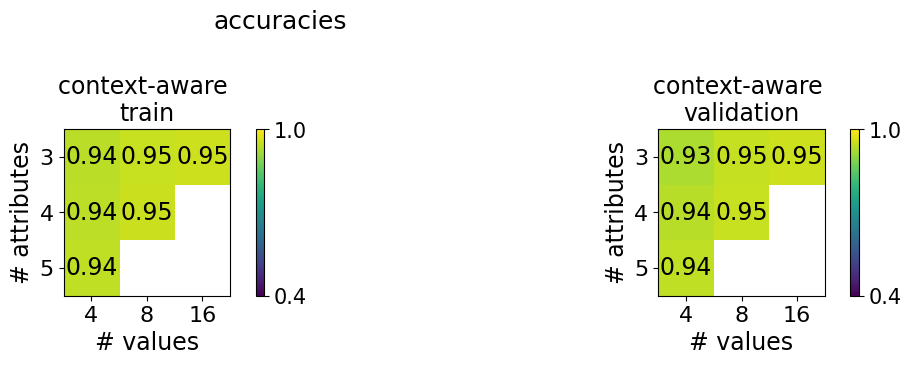

In [6]:
plot_heatmap(accuracies, 'mean', plot_dims=(1,2), ylims=(0.4, 1.0), figsize=(13, 3.5), suptitle='accuracies', 
             fontsize=17)

#### Context-unaware

In [8]:
# training
final_accuracies_train = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['cu_train_acc'][i][run][-1])
    final_accuracies_train[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_train

IndexError: index 0 is out of bounds for axis 0 with size 0

In [9]:
# context unaware
final_accuracies_val = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['cu_val_acc'][i][run][-1])
    final_accuracies_val[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_val

IndexError: index 0 is out of bounds for axis 0 with size 0

#### Context-aware

In [7]:

final_accuracies_train = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['train_acc'][i][run][-1])
    final_accuracies_train[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_train

{'(3,4)': (0.938, 0.011),
 '(3,8)': (0.951, 0.01),
 '(3,16)': (0.955, 0.003),
 '(4,4)': (0.941, 0.027),
 '(4,8)': (0.952, 0.011),
 '(5,4)': (0.943, 0.014)}

In [8]:
final_accuracies_val = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['val_acc'][i][run][-1])
    final_accuracies_val[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_val

{'(3,4)': (0.926, 0.016),
 '(3,8)': (0.947, 0.009),
 '(3,16)': (0.954, 0.003),
 '(4,4)': (0.937, 0.025),
 '(4,8)': (0.95, 0.011),
 '(5,4)': (0.943, 0.014)}

#### Accuracies: Boostrapped CIs

In [9]:
num_bootstrap_samples = 1000  # Number of bootstrap samples
confidence_level = 0.95      # Desired confidence level 

bootstrap_means = []

# context-aware (train, val), context-unaware (train, val)
for i in range(len(accuracies)):
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = [random.choice(accuracies[i]) for _ in range(len(accuracies[i]))]
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)

    # Calculate the lower and upper percentiles of the bootstrap means to construct the confidence interval
    alpha = (1 - confidence_level) / 2
    lower_percentile = np.percentile(bootstrap_means, 100 * alpha)
    upper_percentile = np.percentile(bootstrap_means, 100 * (1 - alpha))
    print(f"Bootstrap Confidence Interval ({100*confidence_level}%): ({lower_percentile}, {upper_percentile}), Mean: {np.mean(bootstrap_means)}")

Bootstrap Confidence Interval (95.0%): (0.9164148019684686, 0.9397438656886419), Mean: 0.9286164481592841
Bootstrap Confidence Interval (95.0%): (0.9128585138916969, 0.9393923247390323), Mean: 0.9267286343525019


### Test accuracies
means and stds

In [10]:
test_accuracies


[array([[0.80592304, 0.80992049, 0.82689661, 0.8251695 , 0.88057393],
        [0.82984769, 0.91517359, 0.90456635, 0.85832489, 0.93058443],
        [0.8316198 , 0.88856649, 0.89594758, 0.89277011, 0.92116499],
        [0.87536985, 0.91288185, 0.86194873, 0.90282029, 0.9110474 ],
        [0.95023161, 0.96260726, 0.94769818, 0.9393543 , 0.92770702],
        [0.94281471, 0.91782558, 0.93210638, 0.93473959, 0.92983478]])]

In [11]:
# first context-aware, then context-unaware
for cond in test_accuracies:
    for i, d in enumerate(datasets):
        print(d, round(np.mean(cond[i]), 3), round(np.std(cond[i]), 3), round(np.min(cond[i]), 2), round(np.max(cond[i]), 2))

(3,4) 0.83 0.027 0.81 0.88
(3,8) 0.888 0.038 0.83 0.93
(3,16) 0.886 0.029 0.83 0.92
(4,4) 0.893 0.02 0.86 0.91
(4,8) 0.946 0.012 0.93 0.96
(5,4) 0.931 0.008 0.92 0.94


In [39]:
import numpy


entropy_scores = load_entropies(paths, context_unaware=context_unaware)
entropy_arrays = {}

# Create a list to store the entropy measures
entropies = []

# Convert the lists of lists to NumPy arrays for each entropy measure and append to entropies

for key, value in entropy_scores.items():
    print(f"{key=} {type(value)=}, {len(value)=}")
    for subitems in value:
        print(f"  {type(subitems)=}")
        for sublist in subitems:
            
            if isinstance(sublist, numpy.ndarray):
                print(f"    {type(sublist)=}  shape={sublist.shape}")
            else:
                print(f"    {type(sublist)=}")
    print("==================")
# for key in entropy_scores:
#     entropy_scores[key] = np.array(entropy_scores[key])

key='NMI' type(value)=<class 'list'>, len(value)=6
  type(subitems)=<class 'list'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
  type(subitems)=<class 'list'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
  type(subitems)=<class 'list'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
  type(subitems)=<class 'list'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<class 'numpy.float64'>
    type(sublist)=<clas

## Entropy scores

In [57]:
entropy_scores = load_entropies(paths, context_unaware=context_unaware)
entropy_arrays = {}

# Create a list to store the entropy measures
entropies = []

# Convert the lists of lists to NumPy arrays for each entropy measure and append to entropies

# for key in entropy_scores:
#     try:
#         entropy_array = np.array(entropy_scores[key])
#         entropies.append(entropy_array)
#     except ValueError:
#         pass

for key in entropy_scores:
    try:
        entropy_array = np.array(entropy_scores[key])
        entropy_scores[key] = entropy_array
    except ValueError:
        print(f"Got a ValueError for {key=}")




12
Got a ValueError for key='NMI_hierarchical'
Got a ValueError for key='effectiveness_hierarchical'
Got a ValueError for key='consistency_hierarchical'
Got a ValueError for key='NMI_context_dep'
Got a ValueError for key='effectiveness_context_dep'
Got a ValueError for key='consistency_context_dep'
Got a ValueError for key='NMI_concept_x_context'
Got a ValueError for key='effectiveness_concept_x_context'
Got a ValueError for key='consistency_concept_x_context'


### General

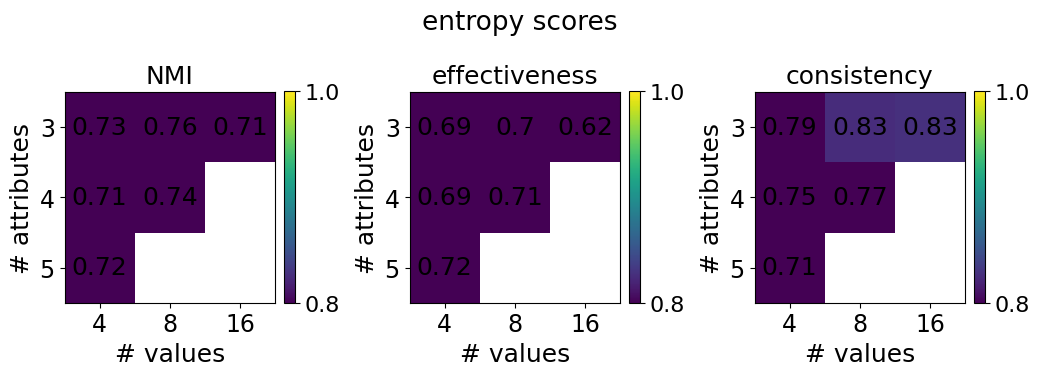

In [53]:
entropies = [entropy_scores[key] for key in ('NMI', 'effectiveness', 'consistency')]
plot_heatmap(entropies, 'mean', plot_dims=(1,3), ylims=(0.8, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='entropy scores')

#### Means and stds

In [8]:
entropy_dict = {}
for i, score in enumerate(list(entropy_scores.keys())[:3]):
    results = entropies[i]
    mean = np.nanmean(results, axis=-1)
    sd = np.std(results, axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict[d + score] = (round(mean[idx], 3), round(sd[idx], 3))
entropy_dict

{'(3,4)NMI': (0.733, 0.035),
 '(3,8)NMI': (0.759, 0.022),
 '(3,16)NMI': (0.71, 0.016),
 '(4,4)NMI': (0.712, 0.065),
 '(4,8)NMI': (0.737, 0.031),
 '(5,4)NMI': (0.715, 0.04),
 '(3,4)effectiveness': (0.688, 0.051),
 '(3,8)effectiveness': (0.704, 0.044),
 '(3,16)effectiveness': (0.622, 0.029),
 '(4,4)effectiveness': (0.688, 0.105),
 '(4,8)effectiveness': (0.709, 0.049),
 '(5,4)effectiveness': (0.719, 0.057),
 '(3,4)consistency': (0.786, 0.024),
 '(3,8)consistency': (0.825, 0.016),
 '(3,16)consistency': (0.828, 0.011),
 '(4,4)consistency': (0.747, 0.016),
 '(4,8)consistency': (0.77, 0.026),
 '(5,4)consistency': (0.712, 0.025)}

#### Bootstraped CIs

In [9]:
num_bootstrap_samples = 1000  # Number of bootstrap samples
confidence_level = 0.95      # Desired confidence level 

bootstrap_means = []

entropies_bootstrapped = {}

for i in range(len(entropies)):
    score = list(entropy_scores.keys())[i]
    for idx, d in enumerate(datasets):
        for _ in range(num_bootstrap_samples):
            bootstrap_sample = [random.choice(entropies[i][idx]) for _ in range(len(entropies[i][idx]))]
            bootstrap_mean = np.mean(bootstrap_sample)
            bootstrap_means.append(bootstrap_mean)

        # Calculate the lower and upper percentiles of the bootstrap means to construct the confidence interval
        alpha = (1 - confidence_level) / 2
        lower_percentile = np.percentile(bootstrap_means, 100 * alpha)
        upper_percentile = np.percentile(bootstrap_means, 100 * (1 - alpha))
        #print(f"Bootstrap Confidence Interval ({100*confidence_level}%): ({round(lower_percentile,2)}, {round(upper_percentile,2)}), Mean: {round(np.mean(bootstrap_means),2)}")
        entropies_bootstrapped[d + score] = (round(lower_percentile,2), round(upper_percentile,2)), round(np.mean(bootstrap_means),2)
entropies_bootstrapped

{'(3,4)NMI': ((0.7, 0.76), 0.73),
 '(3,8)NMI': ((0.71, 0.78), 0.75),
 '(3,16)NMI': ((0.7, 0.77), 0.73),
 '(4,4)NMI': ((0.68, 0.77), 0.73),
 '(4,8)NMI': ((0.68, 0.77), 0.73),
 '(5,4)NMI': ((0.68, 0.77), 0.73),
 '(3,4)effectiveness': ((0.66, 0.77), 0.72),
 '(3,8)effectiveness': ((0.66, 0.77), 0.72),
 '(3,16)effectiveness': ((0.61, 0.77), 0.71),
 '(4,4)effectiveness': ((0.61, 0.77), 0.71),
 '(4,8)effectiveness': ((0.61, 0.77), 0.71),
 '(5,4)effectiveness': ((0.61, 0.77), 0.71),
 '(3,4)consistency': ((0.61, 0.79), 0.71),
 '(3,8)consistency': ((0.62, 0.83), 0.72),
 '(3,16)consistency': ((0.62, 0.83), 0.73),
 '(4,4)consistency': ((0.62, 0.83), 0.73),
 '(4,8)consistency': ((0.62, 0.83), 0.73),
 '(5,4)consistency': ((0.62, 0.83), 0.73)}

### Concept-dependent

In [4]:
entropy_scores = load_entropies(paths, context_unaware=context_unaware)

In [5]:
# from generic to specific
entropies_hierarchical = [entropy_scores['NMI_hierarchical'], entropy_scores['effectiveness_hierarchical'], entropy_scores['consistency_context_dep']]
print(entropies_hierarchical)

entropy_dict_context_dep = {}
for i, score in enumerate(list(entropy_scores.keys())[3:6]):
    results = entropies_hierarchical[i]
    for idx, d in enumerate(datasets):
        mean = np.mean(results[idx], axis=-1)
        #sd = np.std(results[idx], axis=-1)
        entropy_dict_context_dep[d + score] = mean

print(entropy_dict_context_dep)


[[[array([0.89642057, 0.81066818, 0.78744657]), array([0.84777855, 0.7560151 , 0.72013026]), array([0.88691483, 0.82202957, 0.74664267]), array([0.73757898, 0.73894791, 0.69007765]), array([0.85753598, 0.80294826, 0.79093378])], [array([0.87209916, 0.7967512 , 0.74514147]), array([0.78952836, 0.78341102, 0.71660773]), array([0.80977856, 0.79336114, 0.73484866]), array([0.81025932, 0.8048091 , 0.74358528]), array([0.84023322, 0.82156587, 0.77691844])], [array([0.70188991, 0.71308878, 0.67142612]), array([0.76130141, 0.75719112, 0.69525344]), array([0.73553453, 0.725019  , 0.68929055]), array([0.77529069, 0.77296496, 0.71832873]), array([0.77014876, 0.75952142, 0.71246812])], [array([0.83592272, 0.77765975, 0.75335464, 0.72209787]), array([0.79990933, 0.80583061, 0.7889943 , 0.7514077 ]), array([0.77275618, 0.66981252, 0.64076811, 0.58669948]), array([0.77787378, 0.82730053, 0.78091128, 0.74224579]), array([0.81123233, 0.77697679, 0.74412108, 0.70581994])], [array([0.77127448, 0.80050191

#### Bootstrapping CIs: Concept-level

#### Plotting Concept-level

In [16]:
data_list, run_list, level_list = [], [], []
NMI_hierarchical, effectiveness_hierarchical, consistency_hierarchical = [], [], []

for d, data in enumerate(datasets):
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))
        
        for l, level in enumerate([1, 2, 3, 4, 5]):  
            
            data_list.append(data)
            run_list.append(run)
            level_list.append(level)
            
            try: 
                NMI_hierarchical.append(scores['normalized_mutual_info_hierarchical'][l])
                effectiveness_hierarchical.append(scores['effectiveness_hierarchical'][l])
                consistency_hierarchical.append(scores['consistency_hierarchical'][l])
            except: 
                NMI_hierarchical.append(np.nan)
                effectiveness_hierarchical.append(np.nan)
                consistency_hierarchical.append(np.nan)

entropy_dict_hierarchical = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_hierarchical, 
                             'Effectiveness': effectiveness_hierarchical, 'Consistency': consistency_hierarchical}


In [17]:
all_hierarchical = {}
all_hierarchical['metric'] = ['Effectiveness'] * 150 + ['Consistency'] * 150 + ['NMI'] * 150 # change to 25 for one dataset/ 150 for all
all_hierarchical['value'] = (entropy_dict_hierarchical['Effectiveness'] + 
                             entropy_dict_hierarchical['Consistency'] +
                             entropy_dict_hierarchical['NMI'])
all_hierarchical['level'] = entropy_dict_hierarchical['level'] * 3

C:\Users\rvver\AppData\Local\Temp\ipykernel_13348\4195672347.py:2: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x='level', y='value', data=all_hierarchical, hue='metric', errorbar=('ci', 95),


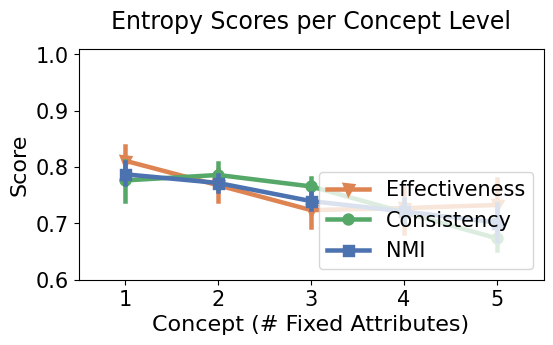

In [18]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_hierarchical, hue='metric', errorbar=('ci', 95),
                   markers=['v', 'o', 's'], palette=sns.color_palette([(0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]), scale=1.2)
plt.ylabel('Score', fontsize=16)
plt.title('Entropy Scores per Concept Level', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('Concept (# Fixed Attributes)', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()

In [19]:
# prepare data for bootstrapping
data_for_bootstrapping = {}

for l, level in enumerate([1, 2, 3, 4, 5]):
    NMI_hierarchical = []

    for d, data in enumerate(datasets):
        for run in range(5):
            
            scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))

            try: 
                NMI_hierarchical.append(scores['normalized_mutual_info_hierarchical'][l])
            except:
                pass
    data_for_bootstrapping[level] = NMI_hierarchical


In [20]:
# prepare data for bootstrapping
data_for_bootstrapping = {}

for l, level in enumerate([1, 2, 3, 4, 5]):
    NMI_hierarchical = []

    for d, data in enumerate(datasets):
        for run in range(5):
            
            scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))

            try: 
                NMI_hierarchical.append(scores['normalized_mutual_info_hierarchical'][l])
            except:
                pass
    data_for_bootstrapping[level] = NMI_hierarchical


In [21]:
num_bootstrap_samples = 1000  # Number of bootstrap samples
confidence_level = 0.95      # Desired confidence level 

bootstrap_means = []

entropies_bootstrapped = {}

for level in [1, 2, 3, 4, 5]: 
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = [random.choice(data_for_bootstrapping[level]) for _ in range(len(data_for_bootstrapping[level]))]
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)

    # Calculate the lower and upper percentiles of the bootstrap means to construct the confidence interval
    alpha = (1 - confidence_level) / 2
    lower_percentile = np.percentile(bootstrap_means, 100 * alpha)
    upper_percentile = np.percentile(bootstrap_means, 100 * (1 - alpha))
    #print(f"Bootstrap Confidence Interval ({100*confidence_level}%): ({round(lower_percentile,2)}, {round(upper_percentile,2)}), Mean: {round(np.mean(bootstrap_means),2)}")
    entropies_bootstrapped[level] = (round(lower_percentile,3), round(upper_percentile,3)), round(np.mean(bootstrap_means),3)
entropies_bootstrapped
    

{1: ((0.768, 0.808), 0.787),
 2: ((0.759, 0.805), 0.78),
 3: ((0.729, 0.803), 0.766),
 4: ((0.707, 0.8), 0.755),
 5: ((0.683, 0.799), 0.745)}

### Context-dependent

In [6]:
# from coarse to fine context
entropies_context_dep = [entropy_scores['NMI_context_dep'], entropy_scores['effectiveness_context_dep'], entropy_scores['consistency_context_dep']]
print(entropies_context_dep)
entropy_dict_context_dep = {}
for i, score in enumerate(list(entropy_scores.keys())[6:9]):
    results = entropies_context_dep[i]
    for idx, d in enumerate(datasets):
        mean = np.mean(results[idx], axis=-1)
        #sd = np.std(results[idx], axis=-1)
        entropy_dict_context_dep[d + score] = mean

print(entropy_dict_context_dep)


[[[array([0.75775785, 0.83635329, 0.86382362]), array([0.70657758, 0.79896393, 0.82451487]), array([0.76619083, 0.81085098, 0.8265013 ]), array([0.68223722, 0.74845055, 0.79229089]), array([0.76514128, 0.83614983, 0.89335255])], [array([0.77797593, 0.78599665, 0.79606967]), array([0.76048152, 0.76127159, 0.76073233]), array([0.79855356, 0.79798654, 0.79951251]), array([0.8015882 , 0.79856309, 0.79494818]), array([0.83460908, 0.83236918, 0.83061263])], [array([0.72383376, 0.71558602, 0.70325052]), array([0.75306724, 0.74366407, 0.73590626]), array([0.74142879, 0.73433574, 0.71745845]), array([0.76965556, 0.76424972, 0.75879576]), array([0.76470382, 0.76008643, 0.75666777])], [array([0.76538472, 0.79840426, 0.80922635, 0.8152716 ]), array([0.81685558, 0.82894072, 0.83912067, 0.84639381]), array([0.63580065, 0.64936012, 0.66341863, 0.66277059]), array([0.77771605, 0.81208129, 0.8266023 , 0.84501995]), array([0.74721295, 0.76967682, 0.78926942, 0.81257485])], [array([0.83041184, 0.83410678

#### Bootstrapping CIs: Context

In [26]:
# prepare data for bootstrapping
data_for_bootstrapping = {}

for l, level in enumerate([0, 1, 2, 3, 4]):
    NMI_hierarchical = []

    for d, data in enumerate(datasets):
        for run in range(5):
            
            scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))

            try: 
                NMI_hierarchical.append(scores['normalized_mutual_info_context_dep'][l])
            except:
                pass
    data_for_bootstrapping[level] = NMI_hierarchical


In [27]:
# prepare data for bootstrapping
data_for_bootstrapping = {}

for l, level in enumerate([0, 1, 2, 3, 4]):
    NMI_hierarchical = []

    for d, data in enumerate(datasets):
        for run in range(5):
            
            scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))

            try: 
                NMI_hierarchical.append(scores['normalized_mutual_info_context_dep'][l])
            except:
                pass
    data_for_bootstrapping[level] = NMI_hierarchical


In [28]:
num_bootstrap_samples = 1000  # Number of bootstrap samples
confidence_level = 0.95      # Desired confidence level 

bootstrap_means = []

entropies_bootstrapped = {}

for level in [0, 1, 2, 3, 4]: 
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = [random.choice(data_for_bootstrapping[level]) for _ in range(len(data_for_bootstrapping[level]))]
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)

    # Calculate the lower and upper percentiles of the bootstrap means to construct the confidence interval
    alpha = (1 - confidence_level) / 2
    lower_percentile = np.percentile(bootstrap_means, 100 * alpha)
    upper_percentile = np.percentile(bootstrap_means, 100 * (1 - alpha))
    #print(f"Bootstrap Confidence Interval ({100*confidence_level}%): ({round(lower_percentile,2)}, {round(upper_percentile,2)}), Mean: {round(np.mean(bootstrap_means),2)}")
    entropies_bootstrapped[level] = (round(lower_percentile,2), round(upper_percentile,2)), round(np.mean(bootstrap_means),2)
entropies_bootstrapped
    

{0: ((0.75, 0.78), 0.77),
 1: ((0.75, 0.79), 0.77),
 2: ((0.75, 0.8), 0.78),
 3: ((0.75, 0.81), 0.78),
 4: ((0.75, 0.81), 0.78)}

#### Plotting per Context condition

In [29]:
data_list, run_list, level_list = [], [], []
NMI_context_dep, effectiveness_context_dep, consistency_context_dep = [], [], []

for d, data in enumerate(datasets):
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))
        
        for l, level in enumerate([1, 2, 3, 4, 5]):  
            
            data_list.append(data)
            run_list.append(run)
            level_list.append(level)
            
            try: 
                NMI_context_dep.append(scores['normalized_mutual_info_context_dep'][l])
                effectiveness_context_dep.append(scores['effectiveness_context_dep'][l])
                consistency_context_dep.append(scores['consistency_context_dep'][l])
            except: 
                NMI_context_dep.append(np.nan)
                effectiveness_context_dep.append(np.nan)
                consistency_context_dep.append(np.nan)

entropy_dict_context_dep = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_context_dep, 
                             'Effectiveness': effectiveness_context_dep, 'Consistency': consistency_context_dep}


In [30]:
all_context_dep = {}
all_context_dep['metric'] = ['Effectiveness'] * 150 + ['Consistency'] * 150 +['NMI'] * 150 
all_context_dep['value'] = (entropy_dict_context_dep['Effectiveness'] + 
                             entropy_dict_context_dep['Consistency'] +
                             entropy_dict_context_dep['NMI']
                            )
all_context_dep['level'] = entropy_dict_context_dep['level'] * 3

C:\Users\rvver\AppData\Local\Temp\ipykernel_13348\574820416.py:2: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x='level', y='value', data=all_context_dep, hue='metric', errorbar=('ci', 95),


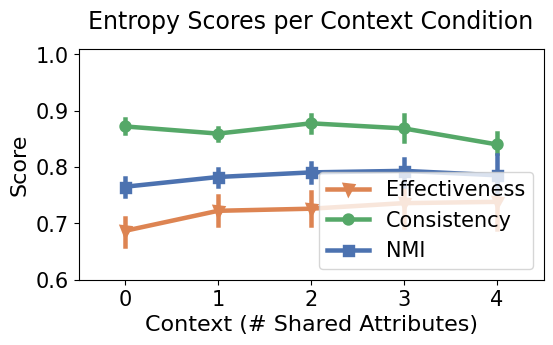

In [31]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_context_dep, hue='metric', errorbar=('ci', 95),
                   markers=['v', 'o', 's'], palette=sns.color_palette([(0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]), 
                   scale=1.2)
plt.ylabel('Score', fontsize=16)
plt.title('Entropy Scores per Context Condition', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[0,1,2,3,4])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('Context (# Shared Attributes)', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()

### Concept x Context

In [7]:
# from generic&coarse to specific&fine
entropies_concept_x_context = [entropy_scores['NMI_concept_x_context'], entropy_scores['effectiveness_concept_x_context'], entropy_scores['consistency_concept_x_context']]
entropy_dict_conc_x_cont = {}
for i, score in enumerate(list(entropy_scores.keys())[9:]):
    results = entropies_context_dep[i]
    for idx, d in enumerate(datasets):
        mean = np.mean(results[idx], axis=-1)
        #sd = np.std(results[idx], axis=-1)
        entropy_dict_conc_x_cont[d + score] = mean
print(entropy_dict_conc_x_cont)

{'(3,4)NMI_concept_x_context': array([0.81931159, 0.77668546, 0.80118104, 0.74099288, 0.83154788]), '(3,8)NMI_concept_x_context': array([0.78668075, 0.76082848, 0.79868421, 0.79836649, 0.8325303 ]), '(3,16)NMI_concept_x_context': array([0.71422343, 0.74421252, 0.73107433, 0.76423368, 0.76048601]), '(4,4)NMI_concept_x_context': array([0.79707173, 0.83282769, 0.6528375 , 0.8153549 , 0.77968351]), '(4,8)NMI_concept_x_context': array([0.83397956, 0.80370204, 0.78186939, 0.79162374, 0.73988322]), '(5,4)NMI_concept_x_context': array([0.83273322, 0.73422098, 0.7779028 , 0.82131343, 0.76639757]), '(3,4)effectiveness_concept_x_context': array([0.76638627, 0.69331277, 0.70707555, 0.62830888, 0.79355108]), '(3,8)effectiveness_concept_x_context': array([0.69290261, 0.6519466 , 0.72935374, 0.7161162 , 0.78213507]), '(3,16)effectiveness_concept_x_context': array([0.58863066, 0.63560578, 0.61410515, 0.66699314, 0.66689982]), '(4,4)effectiveness_concept_x_context': array([0.73429198, 0.82026789, 0.515

#### NMI

In [8]:

plot_heatmap_concept_x_context(entropies_concept_x_context, score='NMI', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 12)
# set plot_dims to (2,3) for all ds

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 1050x700 with 0 Axes>

#### effectiveness

In [9]:
plot_heatmap_concept_x_context(entropies_concept_x_context, score='effectiveness', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 12)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 1050x700 with 0 Axes>

#### consistency

In [10]:
plot_heatmap_concept_x_context(entropies_concept_x_context, score='consistency', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 12)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 1050x700 with 0 Axes>

## Message length

In [12]:
ml_dict = {'level': [], 'data set': [], 'run': [], 'message length': []}
for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        # if evaluated after training from interaction this is an array showing the message length
        # per level of concreteness (most abstract --> most concrete)
        ml_hierarchical = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + 
                                           '/message_length_hierarchical.pkl', 'rb'))
        
        # if evaluated with the callback throughout training, you get an array for each epoch
        if isinstance(ml_hierarchical, dict): 
            ml_hierarchical = ml_hierarchical['message_length_train'][n_epochs]
            
        for level in range(5):
            
            ml_dict['level'].append(level)
            ml_dict['run'].append(run)
            ml_dict['data set'].append(dataset)
            try: 
                ml_dict['message length'].append(ml_hierarchical[level])
            except: 
                ml_dict['message length'].append(np.NaN)

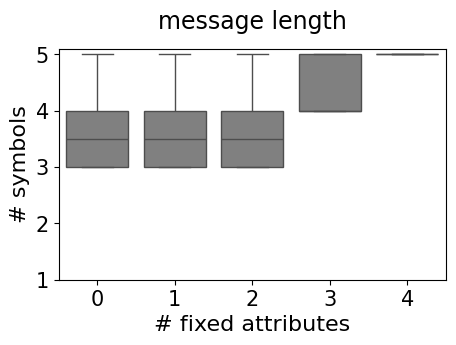

In [13]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='message length', data=ml_dict, color='gray')
plt.xticks(fontsize=15)
plt.yticks(ticks=[1,2,3,4,5], labels=[1,2,3,4,5], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('# symbols', fontsize=16)
plt.title('message length', fontsize=17, y=1.05)
plt.show()

## Symbol redundancy

In [14]:
symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(run) + '/symbol_redundancy.pkl', 'rb'))
            
        for level in range(5):
            
            symbol_redundancy_dict['level'].append(level)
            symbol_redundancy_dict['run'].append(run)
            symbol_redundancy_dict['data set'].append(dataset)
            try: 
                symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
            except: 
                symbol_redundancy_dict['symbol frequency'].append(np.NaN)

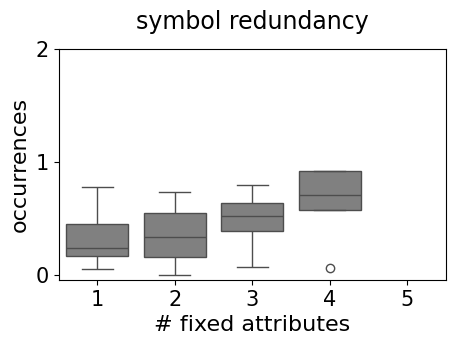

In [15]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy', fontsize=17, y=1.05)
plt.show()

## Compositionality

In [11]:
topsim, posdis, bosdis = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))
topsim_specific, posdis_specific, bosdis_specific = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))
topsim_generic, posdis_generic, bosdis_generic = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim_score = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent_score = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        topsim[d, run] = topsim_score['topsim_train']
        posdis[d, run] = disent_score['posdis']
        bosdis[d, run] = disent_score['bosdis']
        topsim_specific[d, run] = topsim_score['topsim_specific_train']
        posdis_specific[d, run] = disent_score['posdis_specific']
        bosdis_specific[d, run] = disent_score['bosdis_specific']
        topsim_generic[d, run] = topsim_score['topsim_generic_train']
        posdis_generic[d, run] = disent_score['posdis_generic']
        bosdis_generic[d, run] = disent_score['bosdis_generic']

### Topsim

In [12]:
for i, d in enumerate(datasets):
    print(d, "topsim:", round(np.mean(topsim[i]), 3), "sd", round(np.std(topsim[i]), 2))

(3,4) topsim: 0.387 sd 0.04
(3,8) topsim: 0.154 sd 0.07
(3,16) topsim: 0.147 sd 0.05
(4,4) topsim: 0.298 sd 0.07
(4,8) topsim: 0.211 sd 0.03
(5,4) topsim: 0.274 sd 0.02


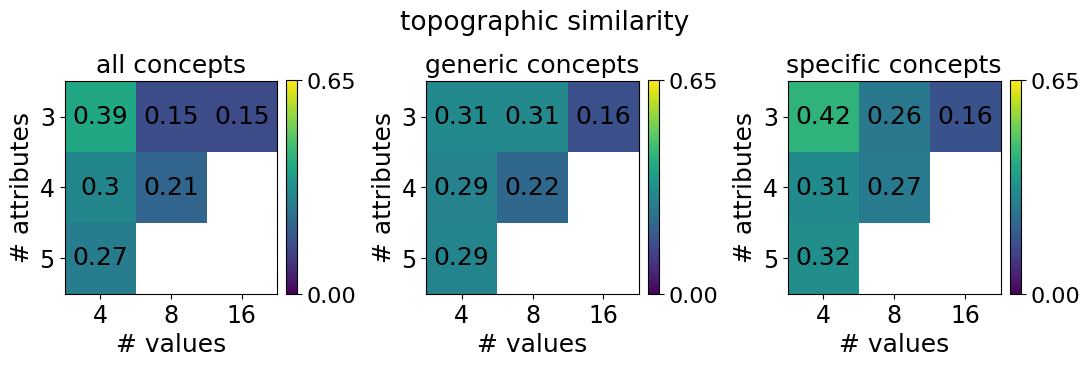

In [13]:
plot_heatmap([topsim, topsim_generic, topsim_specific], 'mean', plot_dims=(1,3), ylims=[0.0,0.65], figsize=(11,3.5), 
             titles=['all concepts', 'generic concepts', 'specific concepts'], suptitle='topographic similarity', suptitle_position=1.)

### Posdis

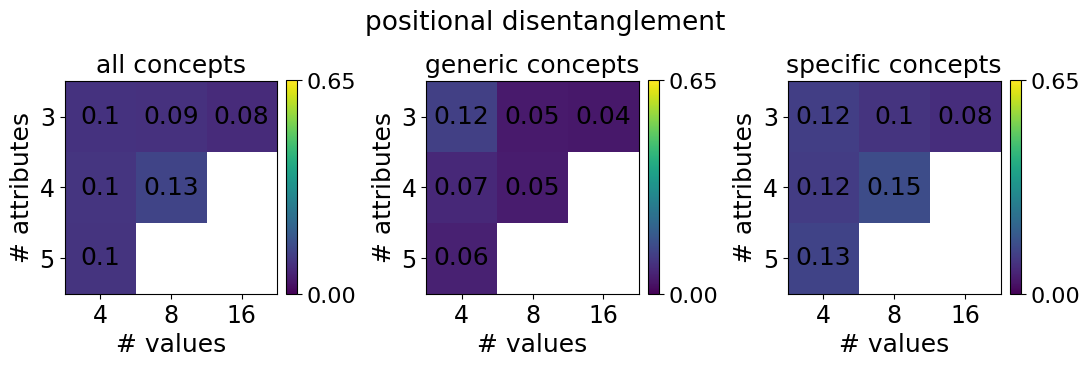

In [14]:
plot_heatmap([posdis, posdis_generic, posdis_specific], 'mean', plot_dims=(1,3), ylims=[0.0,0.65], figsize=(11,3.5),
             titles=['all concepts', 'generic concepts', 'specific concepts'], suptitle='positional disentanglement', suptitle_position=1.)

### Bosdis

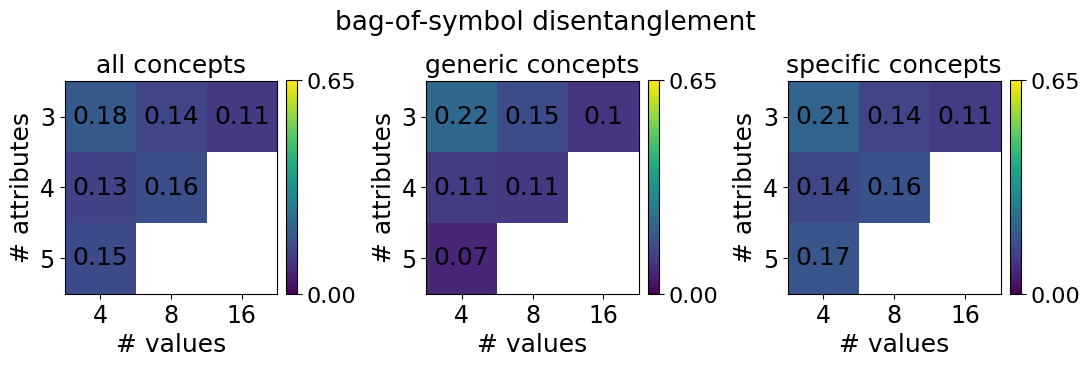

In [15]:
plot_heatmap([bosdis, bosdis_generic, bosdis_specific], 'mean', plot_dims=(1,3), ylims=[0.0,0.65], figsize=(11,3.5),
             titles=['all concepts', 'generic concepts', 'specific concepts'], suptitle='bag-of-symbol disentanglement', suptitle_position=1.)

In [16]:
bosdis = []

for d, dataset in enumerate(datasets): 
    sublist = []
    for run in range(5):
        sublist.append(pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/bosdis_scores.pkl', 'rb')))
    bosdis.append(sublist)

c:\Users\rvver\Documents\CodeThesis\emergent-abstractions\utils\plot_helpers.py:166: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)
c:\Users\rvver\Documents\CodeThesis\emergent-abstractions\utils\plot_helpers.py:166: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)
c:\Users\rvver\Documents\CodeThesis\emergent-abstractions\utils\plot_helpers.py:166: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)
c:\Users\rvver\Documents\CodeThesis\emergent-abstractions\utils\plot_helpers.py:166: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)
c:\Users\rvver\Documents\CodeThesis\emergent-abstractions\utils\plot_helpers.py:166: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)
c:\Users\rvver\Documents\CodeThesis\emergent-abstractions\utils\plot_helpers.py:166: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)


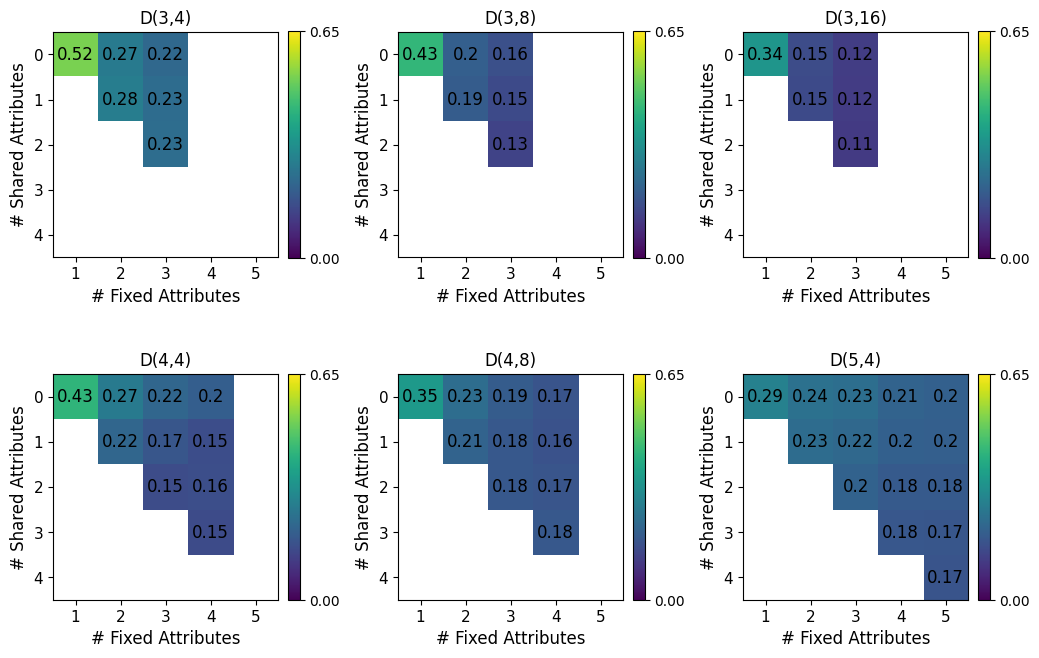

In [17]:
plot_heatmap_concept_x_context(bosdis, score='bosdis', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 12, ylims=(0,0.65))

### Compositionality per dataset

In [19]:
# compositionality scores for each data set

compositionality_scores = {'dataset':[], 'run':[], 'metric':[], 'data':[], 'score':[]}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        
        for metric in ['topsim', 'posdis', 'bosdis']:
            #for data in ['all', 'concrete']: 
            for data in ['all']:
                
                compositionality_scores['dataset'].append(dataset)
                compositionality_scores['run'].append(run)
                compositionality_scores['metric'].append(metric)
                compositionality_scores['data'].append(data)
                
                append = '' if data == 'all' else '_max_relevance'
                    
                if metric == 'topsim':
                    compositionality_scores['score'].append(topsim['topsim' + append + '_train'])
                if metric == 'posdis':
                    compositionality_scores['score'].append(disent['posdis' + append])
                if metric == 'bosdis':
                    compositionality_scores['score'].append(disent['bosdis' + append])

compositionality_scores = pd.DataFrame(compositionality_scores)

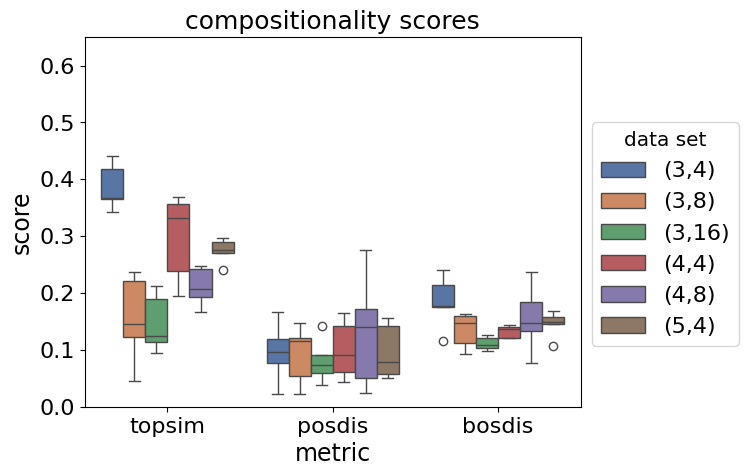

In [20]:
sns.boxplot(x='metric', y='score', data=compositionality_scores[compositionality_scores.data=='all'], 
            hue='dataset', palette='deep')
plt.xlabel(xlabel='metric', fontsize=17)
plt.ylabel(ylabel='score', fontsize=17)
plt.xticks(fontsize=16)
plt.yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], fontsize=16)
plt.ylim(0, 0.65)
legend = plt.legend(fontsize=16, title='data set', bbox_to_anchor=(1., 0.8))
plt.setp(legend.get_title(),fontsize='x-large')
plt.title('compositionality scores', fontsize=18)
plt.show()

## co-occurrences (not done yet)

In [ ]:
# Not done (yet)
full_plot = False

fig = plt.figure(figsize=(12,3))

for d, dim in enumerate(datasets): 
    
    data = datasets[d]
    path = paths[d]
    vs_factor = int(path[-2])
    vocab_size = (n_values[d] + 1) * vs_factor + 1
    colors = plt.cm.jet(np.linspace(0,1,vocab_size))
    
    average_cooccurences = []
    
    plt.subplot(1,6,d+1)
    
    for run in range(5):
        
        cooccurences = pickle.load(open(paths[d] + 'standard/' + str(run) + '/normalized_cooccurrence.pkl', 'rb'))
        indices = np.flip(np.argsort(cooccurences[:,-1]))
        cooccurences = cooccurences[indices]
        average_cooccurences.append(cooccurences)
        
    average_cooccurences = np.flip(np.mean(average_cooccurences, axis=0), axis=1)
    
    data_dict = {}
    data_dict['symbol rank'] = []
    data_dict['level'] = []
    data_dict['value'] = []
    for symbol in indices:
        for level in range(average_cooccurences.shape[1]):
            data_dict['symbol rank'].append(symbol+1)
            data_dict['level'].append(level)
            data_dict['value'].append(average_cooccurences[symbol, level])
    
    if full_plot:
        g = sns.heatmap(average_cooccurences, cmap='viridis')
        plt.yticks(ticks=[0.5,vocab_size-1.5], labels=[1,vocab_size], fontsize=14)
    else: 
        g = sns.heatmap(average_cooccurences[0:10,:], cmap='viridis')
        plt.yticks(ticks=[0.5,9.5], labels=[1,10], fontsize=14, rotation=0)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=13)
    for _, spine in g.spines.items():
        spine.set_visible(True)
    #plt.xlabel('# relevant attributes', fontsize=14)
    #plt.ylabel('symbol rank', fontsize=14)
    plt.xticks(ticks=np.arange(n_attributes[d])+0.5, labels=range(1,n_attributes[d]+1), fontsize=14)
    plt.title(data, fontsize=14)
    
    fig.text(0.5, -0.05, '# relevant attributes', ha='center', va='center', fontsize=15, alpha=0.3)
    fig.text(-0.01, 0.5, 'symbol rank', ha='center', va='center', rotation='vertical', fontsize=15, alpha=0.3)

plt.tight_layout()